In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv("../data/scores_synth.csv")
print(data.shape)
data

(1000, 3)


,income,score,internet_connection
0,69.454075,635.305372,1
1,47.632800,743.301322,1
2,22.905094,673.037833,1
3,4.465032,442.894112,0
4,19.360381,627.178633,1
...,...,...,...
995,8.801915,464.993872,0
996,15.317348,641.288260,1
997,25.411924,641.858088,1
998,4.898013,447.408180,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   income               1000 non-null   float64
 1   score                1000 non-null   float64
 2   internet_connection  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [25]:
data.describe()

,income,score,internet_connection
count,1000.000000,1000.000000,1000.000000
mean,25.132120,609.472997,0.691000
std,17.217098,82.097653,0.462312
min,0.893344,294.585973,0.000000
25%,13.581826,553.830647,0.000000
50%,19.073273,612.714370,1.000000
75%,34.970305,668.431175,1.000000
max,77.006947,845.859379,1.000000


In [26]:
data.corr()

,income,score,internet_connection
income,1.000000,0.655725,0.229461
score,0.655725,1.000000,0.286389
internet_connection,0.229461,0.286389,1.000000


Text(0.5, 0, 'income (in 1k euros)')

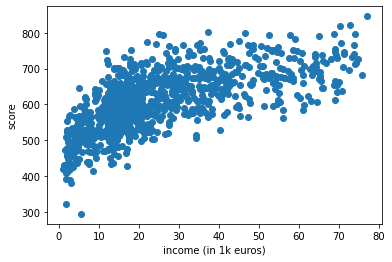

In [27]:
plt.scatter(data['income'], data['score'])
plt.ylabel('score')
plt.xlabel('income (in 1k euros)')

Let's draw a linear line across this scatter plot. 

In other words,
$$ y=f(x)=\alpha+\beta*x$$
$$score = f(income)=\alpha+\beta*income$$

In [28]:
Y = data['score']
X = data[['income']]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, shuffle=True)

In [30]:
pd.concat([X_train,y_train],axis=1)

,income,score
76,13.214167,549.322568
628,54.045251,664.819588
979,65.161742,678.547076
625,39.608247,658.524272
50,57.622876,729.777774
...,...,...
41,14.837684,456.038666
957,23.059656,633.679318
944,19.045321,510.582422
72,27.966513,592.753275


In [31]:
pd.concat([X_test,y_test],axis=1)

,income,score
172,24.055759,632.189002
753,20.562945,634.574848
282,2.614749,469.111732
854,36.120078,610.658561
849,14.157808,499.348566
...,...,...
426,56.357298,674.128595
311,16.884082,612.799343
451,11.271721,599.359606
659,25.918958,792.631696


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='score'>

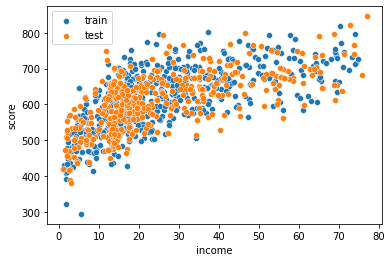

In [32]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max())
sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
print('alpha is',lr.intercept_)
print('beta is', lr.coef_)

alpha is 531.601998109194
beta is [3.1890369]


In [35]:
lr.predict(X_test)

array([608.3167023 , 597.17798803, 539.9405289 , 646.79025834,
       576.75177154, 576.01491483, 619.99981546, 545.35680809,
       612.60262818, 584.1384048 , 593.25244745, 597.11266231,
       587.39359484, 577.93355615, 580.37603005, 615.76532721,
       566.3230615 , 660.14292076, 638.01434491, 653.726899  ,
       579.46308667, 574.86457308, 574.63888122, 540.3815763 ,
       613.70082486, 578.29783257, 592.64229414, 574.42112212,
       683.50475572, 568.61445167, 675.93270625, 736.27113436,
       638.57941343, 614.4318002 , 573.63383073, 631.579284  ,
       627.314534  , 609.3877985 , 576.55418207, 555.675836  ,
       652.64011346, 740.04352997, 572.39133356, 570.0171017 ,
       630.49171608, 555.8252775 , 578.06139899, 570.44705312,
       633.74665938, 636.60618024, 703.53070056, 627.1480676 ,
       586.69929901, 573.65964585, 553.86145516, 591.41469552,
       560.43587556, 579.0084092 , 706.28459845, 717.95918104,
       575.39656156, 594.31443421, 731.79497058, 539.27

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


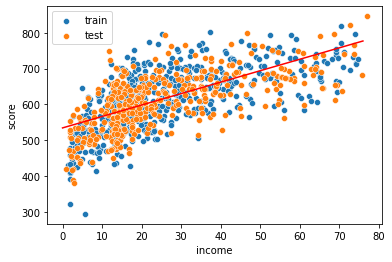

In [36]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max())
y_hat = lr.intercept_ + lr.coef_[0]*x_range
sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')
plt.plot(y_hat, color='r')
plt.legend()

## Inference

One of the reasons why **linear regressions** are very popular despite its restrictive assumption on the functional form is due to their simplcity and **interpretability**. We will see how to treat non-linear relationships with a linear model in the next class.

 
Going back to the formulation: 
$$ y=f(x)=a+b*x$$
$$score = f(income)=a+b*income$$
$$score = f(income)=a*1+b*income$$



How do we interpret this function?

#### Coefficient
It's actually very simple... The impact of a variable in a linear model is constant across different values of that variable. Hence, we can state that for every 1.000 euro increase on students income we get on average (expectation) an increase of 4 points in score. Look again... do you see any issue with that 'functionality' of linear regression?

## Mean Squared Error

$$MSE = \frac{1}{N} \sum_i^N (Y_i-\hat{Y_i})^2$$

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lr.predict(X_test))

3609.6209633984586

In [38]:
lr.predict(X_test)
losses = {}
losses['Linear'] = mean_squared_error(y_test, lr.predict(X_test))
print(losses)

{'Linear': 3609.6209633984586}


## Polynomials

$$y = a + \beta_1 \times\text{income} + \beta_2 \times{income}^2 + \epsilon$$

In [39]:
data['income2'] = data['income']**2

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data[['income','income2']], data['score'], test_size=0.4, shuffle=True)

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


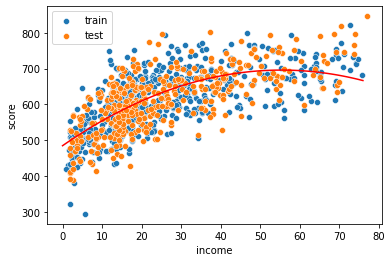

In [42]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max())
y_hat = lr.intercept_ + lr.coef_[0]*x_range + lr.coef_[1]*(x_range**2)
sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')
plt.plot(y_hat, color='r')
plt.legend()

In [43]:
lr.predict(X_test)
losses['Linear, polynomial2'] = mean_squared_error(y_test, lr.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3609.6209633984586
Linear, polynomial2  :  3501.0456916114613


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


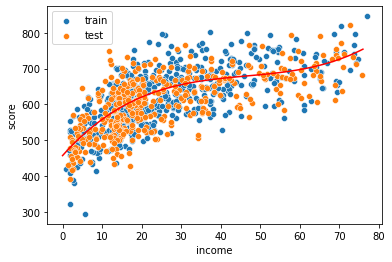

In [44]:
data['income3'] = data['income']**3
X_train, X_test, y_train, y_test = train_test_split(data[['income','income2','income3']], data['score'], test_size=0.4, shuffle=True)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
    
y_hat = lr.intercept_ + lr.coef_[0]*x_range + lr.coef_[1]*(x_range**2) + lr.coef_[2]*(x_range**3)
sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')
plt.plot(y_hat, color='r')
plt.legend()

In [45]:
losses['Linear: polynomial3'] = mean_squared_error(y_test, lr.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3609.6209633984586
Linear, polynomial2  :  3501.0456916114613
Linear: polynomial3  :  3298.4314142640023
